## 1. Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import r2_score

In [2]:
from statistics import mean
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from collections import Counter
from numpy import log
from itertools import combinations


## 2. Data

In [3]:
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt

--2021-12-02 13:17:06--  https://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 45.122.249.78, 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|45.122.249.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt.9’

data2.txt.9         100%[===================>]   1.15M  1.00MB/s    in 1.1s    

2021-12-02 13:17:09 (1.00 MB/s) - ‘data2.txt.9’ saved [1203726/1203726]

--2021-12-02 13:17:09--  https://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 45.122.249.78, 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|45.122.249.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt.9’

data3.txt.9         100%[===================>] 174.70K   384KB/s    in 0.5s    

2021-12-02 13:17:10 (384 KB/s) - ‘data3.txt.9’ saved [178891/178891]

--2021-12-02 13:17:10--  https://cs.uit.edu.vn/data4.txt
Resolvi

In [4]:
train_path = "data2.txt"
test_path3 = "data3.txt"
test_path4 = "data4.txt"

In [5]:
#read data
train = pd.read_csv(train_path, header=None)
test3 = pd.read_csv(test_path3, header=None)
test4 = pd.read_csv(test_path4, header=None)

In [6]:
header = ["size", "time"]

In [7]:
train.columns=header
test3.columns= header
test4.columns= header

In [8]:
#ize_ = np.array(train["size"])
#time_ = np.array(train["time"])

In [9]:
train.head(5)

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


## 3. Visualize

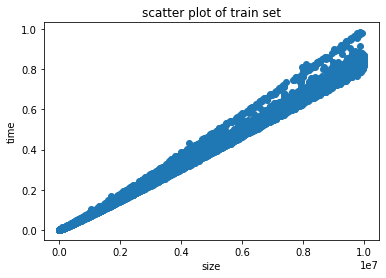

In [10]:
#plot train
plt.scatter(train["size"],train["time"])
plt.title("scatter plot of train set")
plt.xlabel("size")
plt.ylabel("time")
plt.show()

In [11]:
#Độ tương quan #correlation
scipy.stats.pearsonr(train["size"],train["time"])

(0.9987955242864204, 0.0)

## 4. Simple LinearRegression

####train set

In [12]:
lr = LinearRegression()

x_train = np.array(train["size"]).reshape(-1, 1)
y_train = np.array(train["time"]).reshape(-1, 1)

#fit
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
#train predict
y_train_pred = lr.predict(x_train)

mse_train = mean_squared_error(y_train, y_train_pred)

print("mse_train = ", mse_train)
print("rmse_train = ", sqrt(mse_train))


r2_score_train = r2_score(y_train, y_train_pred)
print("r2_score_train = ", r2_score_train)

mse_train =  0.00014337728721748835
rmse_train =  0.011974025522667318
r2_score_train =  0.9975924993345858


#### test 3 set

In [14]:
#reshape
x_test3 = np.array(test3["size"]).reshape(-1, 1)
y_test3 = np.array(test3["time"]).reshape(-1, 1)

#predict
y_pred3 = lr.predict(x_test3)

#error
mse_test3 = mean_squared_error(y_test3, y_pred3)

print("mse_test3 = ", mse_test3)
print("rmse_test3 = ",sqrt(mse_test3))

r2_score_test3 = r2_score(y_test3, y_pred3)
print("r2_score_test3 = ", r2_score_test3)

mse_test3 =  0.020664949397549082
rmse_test3 =  0.14375308482794058
r2_score_test3 =  0.9284132208349453


###test 4 set



In [15]:
#reshape
x_test4 = np.array(test4["size"]).reshape(-1, 1)
y_test4 = np.array(test4["time"]).reshape(-1, 1)

#predict
y_pred4 = lr.predict(x_test4)

#error
mse_test4 = mean_squared_error(y_test4, y_pred4)


print("mse_test4 = ", mse_test4)
print("rmse_test4 = ", sqrt(mse_test4))

r2_score_test4 = r2_score(y_test4, y_pred4)
print("r2_score_test4 = ", r2_score_test4)

mse_test4 =  0.22348476817426036
rmse_test4 =  0.4727417563260732
r2_score_test4 =  0.3156839605365861


## 5. Cải thiện mô hình


### Giảm kích thước bộ dữ liệu

#### Thăm dò dữ liệu

In [16]:
train.describe()

,size,time
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [17]:
temp_train = train.sort_values("size")

In [18]:
temp_train

,size,time
504,255,0.000009
33963,320,0.000011
47822,443,0.000017
2598,529,0.000023
40808,555,0.000025
...,...,...
31827,9997873,0.865056
17431,9998178,0.827196
19247,9999502,0.835126
5653,9999533,0.862753


In [19]:
fr= train["size"].min()
_25_to = train.describe()["size"].loc["25%"]
_50_to = train.describe()["size"].loc["50%"]
_75_to = train.describe()["size"].loc["75%"]
_100_to =  train["size"].max()

In [20]:
#sstep=(_25_to-fr)/20

#### Tìm ngưỡng để loại bỏ bớt dữ liệu

+ Chúng em tìm ngưỡng để giảm kích thước dữ liệu bằng cách chạy từ min đến max và chia ra thành 1000 bin.

In [21]:
#chia 1000 bin
_lst_size= np.linspace(fr,_100_to,1000)

In [22]:
#create mse, r2 list
mse_lst = []
r2_lst  = []

In [23]:
for i in range(len(_lst_size)):

  new_data = train[train["size"]>=_lst_size[i]] #create newdata with size >= _list_size[i]
  lr = LinearRegression()
  
  ##
  x_train = np.array(new_data["size"]).reshape(-1, 1)
  y_train = np.array(new_data["time"]).reshape(-1, 1)
  
  new_lr = lr.fit(x_train, y_train)
  y_train_pred = new_lr.predict(x_train)

  print(">>>>>>>>>>>>>>>", i)
  
  mse_train = mean_squared_error(y_train, y_train_pred)
  r2_score_train = r2_score(y_train, y_train_pred)

  ##
  y_pred3 = new_lr.predict(x_test3)
  mse_test3 = mean_squared_error(y_test3, y_pred3)
  #print("mse3=",mse_test3)
  r2_score_test3 = r2_score(y_test3, y_pred3)
  #print("r2_test3test3= ",r2_score_test3)

  ##
  y_pred4 = new_lr.predict(x_test4)
  mse_test4= mean_squared_error(y_test4, y_pred4)
  #print("mse4mse4=",mse_test4)
  r2_score_test4 = r2_score(y_test4, y_pred4)
  #print("r2_test4test4= ",r2_score_test4)

  mse_lst.append([mse_train, mse_test3, mse_test4])
  r2_lst.append([r2_score_train,r2_score_test3, r2_score_test4 ])


>>>>>>>>>>>>>>> 0
>>>>>>>>>>>>>>> 1
>>>>>>>>>>>>>>> 2
>>>>>>>>>>>>>>> 3
>>>>>>>>>>>>>>> 4
>>>>>>>>>>>>>>> 5
>>>>>>>>>>>>>>> 6
>>>>>>>>>>>>>>> 7
>>>>>>>>>>>>>>> 8
>>>>>>>>>>>>>>> 9
>>>>>>>>>>>>>>> 10
>>>>>>>>>>>>>>> 11
>>>>>>>>>>>>>>> 12
>>>>>>>>>>>>>>> 13
>>>>>>>>>>>>>>> 14
>>>>>>>>>>>>>>> 15
>>>>>>>>>>>>>>> 16
>>>>>>>>>>>>>>> 17
>>>>>>>>>>>>>>> 18
>>>>>>>>>>>>>>> 19
>>>>>>>>>>>>>>> 20
>>>>>>>>>>>>>>> 21
>>>>>>>>>>>>>>> 22
>>>>>>>>>>>>>>> 23
>>>>>>>>>>>>>>> 24
>>>>>>>>>>>>>>> 25
>>>>>>>>>>>>>>> 26
>>>>>>>>>>>>>>> 27
>>>>>>>>>>>>>>> 28
>>>>>>>>>>>>>>> 29
>>>>>>>>>>>>>>> 30
>>>>>>>>>>>>>>> 31
>>>>>>>>>>>>>>> 32
>>>>>>>>>>>>>>> 33
>>>>>>>>>>>>>>> 34
>>>>>>>>>>>>>>> 35
>>>>>>>>>>>>>>> 36
>>>>>>>>>>>>>>> 37
>>>>>>>>>>>>>>> 38
>>>>>>>>>>>>>>> 39
>>>>>>>>>>>>>>> 40
>>>>>>>>>>>>>>> 41
>>>>>>>>>>>>>>> 42
>>>>>>>>>>>>>>> 43
>>>>>>>>>>>>>>> 44
>>>>>>>>>>>>>>> 45
>>>>>>>>>>>>>>> 46
>>>>>>>>>>>>>>> 47
>>>>>>>>>>>>>>> 48
>>>>>>>>>>>>>>> 49
>>>>>>>>>>>>>>> 50
>>>>>>>>>>>>>>> 51
>>>>>>>>>>>>>>> 52
>>>

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [24]:
score_mse = pd.DataFrame(mse_lst)
score_r2  = pd.DataFrame(r2_lst)

In [25]:
col = ["train", "test3", "test4"]

In [26]:
score_mse

,0,1,2
0,0.000143,0.020665,0.223485
1,0.000143,0.020601,0.222981
2,0.000143,0.020534,0.222458
3,0.000143,0.020475,0.221997
4,0.000143,0.020412,0.221502
...,...,...,...
995,0.000193,9.116737,51.150501
996,0.000184,14.592884,82.607386
997,0.000165,69.665020,401.604226
998,0.000164,38.349037,219.898501


In [27]:
score_mse.columns= col
score_r2.columns = col

score_r2["bin"]= score_r2.index
score_mse["bin"]= score_mse.index



In [28]:
score_r2

,train,test3,test4,bin
0,0.997592,0.928413,0.315684,0
1,0.997590,0.928636,0.317226,1
2,0.997587,0.928867,0.318827,2
3,0.997584,0.929071,0.320241,3
4,0.997581,0.929289,0.321756,4
...,...,...,...,...
995,0.033971,-30.581876,-155.624133,995
996,0.028520,-49.552148,-251.945915,996
997,0.041484,-240.331071,-1228.722347,997
998,0.005991,-131.847363,-672.334799,998


* Loại bỏ giá trị âm

In [29]:
score_r2 = score_r2[score_r2["test3"] > 0]

In [30]:
score_r2 = score_r2[score_r2["test4"] > 0]

#### Trực quan kết quả

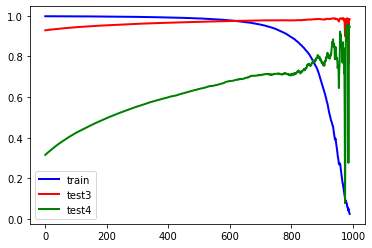

In [31]:
plt.plot( 'bin', 'train', data=score_r2, marker='', color='blue', linewidth=2)
plt.plot( 'bin', 'test3', data=score_r2, marker='', color='red', linewidth=2)
plt.plot( 'bin', 'test4', data=score_r2, marker='', color='green', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

* Ở đây ta có thể thấy 2 điểm giao nhau giữa train với test3 và train với test4. Chúng chọn ngưỡng bằng với giá trị bin tại điểm giao giữa train và test3 thay vì train và test4 vì, ở đây R^2_Score của train chưa lao dốc và R^2_Score của 2 tập test thì đang tăng.
* Lý do thứ 2 để không chọn điểm giao nhau giữa train và test4 là vì khi đó giá trị là rất lớn gây ra việc bộ dữ liệu được loại bỏ còn lại sẽ rất nhỏ. 
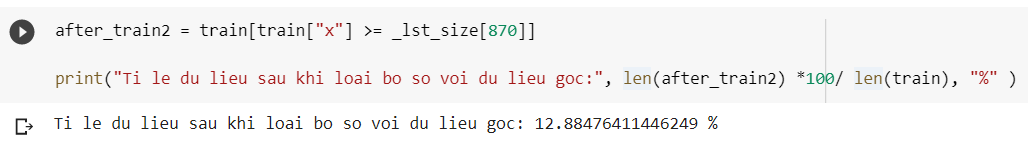

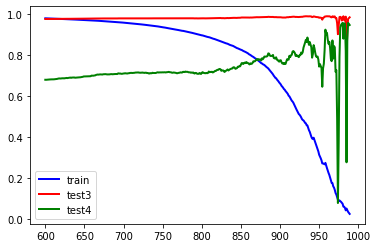

In [32]:
score_r2_2  =score_r2[score_r2["bin"]>=600]

plt.plot( 'bin', 'train', data=score_r2_2, marker='', color='blue', linewidth=2)
plt.plot( 'bin', 'test3', data=score_r2_2, marker='', color='red', linewidth=2)
plt.plot( 'bin', 'test4', data=score_r2_2, marker='', color='green', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

In [33]:
#check again
score_r2_2  =score_r2_2[score_r2_2["bin"]<=650]
score_r2_2

,train,test3,test4,bin
600,0.977461,0.974174,0.678467,600
601,0.977286,0.974159,0.678314,601
602,0.977163,0.974203,0.678760,602
603,0.977027,0.974224,0.678970,603
604,0.976940,0.974284,0.679573,604
605,0.976779,0.974294,0.679673,605
606,0.976648,0.974329,0.680023,606
607,0.976517,0.974356,0.680296,607
608,0.976388,0.974363,0.680368,608
609,0.976196,0.974353,0.680265,609


In [34]:
mini_range = _lst_size[620]

In [35]:
mini_range

6206229.714714714

=> Dựa vào những bước thực nghiệm phái trên, chúng em loại bỏ dữ liệu train có giá trị của feature "size" < 6206229.714714714 (mini_range)


####Kết quả sau khi giảm dữ liệu

In [36]:
#print score
def print_score(y, y_pred, name):
  _mse = mean_squared_error(y, y_pred)
  print("mse_"+name+"= ", _mse)
  print("rmse_"+name+"= ", sqrt(_mse))

  _r2= r2_score(y, y_pred)
  print("r2_score_"+name+"= ", _r2)


In [37]:
after_train = train[train["size"] >= mini_range]

print("Ti le du lieu sau khi loai bo so voi du lieu goc:", len(after_train) *100/ len(train), "%" )

Ti le du lieu sau khi loai bo so voi du lieu goc: 37.8907403501371 %


In [38]:
_x_train = np.array(after_train["size"]).reshape(-1,1)
_y_train = np.array(after_train["time"]).reshape(-1,1)

* train

In [39]:
_lr = LinearRegression()
lr_model = _lr.fit(_x_train, _y_train)
_y_pred_train= lr_model.predict(_x_train)

print_score(_y_train, _y_pred_train,name = "train")

mse_train=  0.00024139123455737554
rmse_train=  0.015536770403059175
r2_score_train=  0.9743836196739416


* test 3

In [40]:
_y_test3_pred= lr_model.predict(x_test3)

print_score(y_test3, _y_test3_pred, name = "test3")

mse_test3=  0.007280807202570575
rmse_test3=  0.08532764617971467
r2_score_test3=  0.974778087895266


* test 4

In [41]:
_y_test4_pred= lr_model.predict(x_test4)

print_score(y_test4, _y_test4_pred, name = "test4")

mse_test4=  0.10301423421513381
rmse_test4=  0.32095830603854736
r2_score_test4=  0.6845677969807341


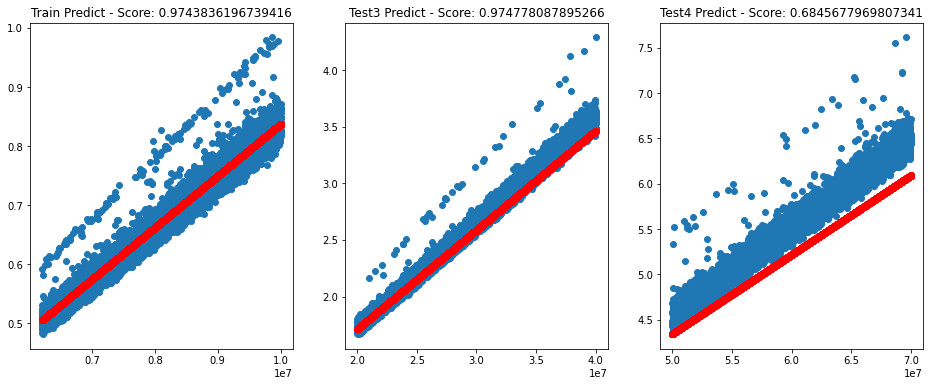

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].scatter((_x_train), _y_train)
ax[0].scatter((_x_train), lr_model.predict(_x_train), c='r')
ax[0].set_title('Train Predict - Score: {}'.format(lr_model.score(_x_train,_y_train)))

ax[1].scatter((x_test3), y_test3)
ax[1].scatter((x_test3), lr_model.predict(x_test3), c='r')
ax[1].set_title('Test3 Predict - Score: {}'.format(lr_model.score(x_test3,y_test3)))

ax[2].scatter((x_test4), y_test4)
ax[2].scatter((x_test4), lr_model.predict(x_test4), c='r')
ax[2].set_title('Test4 Predict - Score: {}'.format(lr_model.score(x_test4,y_test4)))

plt.show()

* Bảng so sánh giữa hai mô hình Simple LinearRegression trên tập dữ liệu ban đầu và tập dữ liệu mới sau khi loại bỏ bớt dữ liệu.

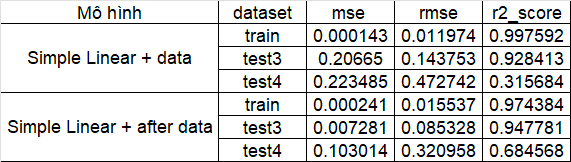

* Dựa vào bảng đánh giá ở trên ta có thể nhận thấy bộ dữ liệu train sau khi loại bỏ bớt dữ liệu cho kết quả tốt hơn trên 2 tập test3, test4 so với bộ dữu liệu train ban đầu.

###  Sử dụng các hàm độ phức tạp 

y = 𝞱_1 x + 𝞱_2x^2 + 𝞱_3*log(x) +𝞱_4*x*log(x) + 𝞱_5*sqrt(x) + 𝞱_0

In [43]:
_lst_variables = ["x", "x2", 'logx', "xlogx", "sqrtx"]

In [44]:
#train = train[["x", "y"]]

In [45]:
def create_new_data(train): 
  train.columns = ["x", "y"]
  train["x2"] = train["x"] * train["x"]
  train["logx"] = log(train["x"])
  train["xlogx"] = train["x"] * log(train["x"])
  train["sqrtx"] = (train["x"]) **1/2
  return train

In [46]:
'''train = train[["x", "y"]]

test3 = test3[["x", "y"]]

test4 = test4[["x", "y"]]

after_train =after_train[["x", "y"]]'''

'train = train[["x", "y"]]\n\ntest3 = test3[["x", "y"]]\n\ntest4 = test4[["x", "y"]]\n\nafter_train =after_train[["x", "y"]]'

In [47]:
train = create_new_data(train)

test3 = create_new_data(test3)

test4 = create_new_data(test4)

after_train = create_new_data(after_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

####Đơn biến

In [48]:
#score
def print_score(y, y_pred, name, rmse_lst, r2_lst):
  _mse = mean_squared_error(y, y_pred)
  
  #print("mse_"+name+"= ", _mse)
  #print("rmse_"+name+"= ", sqrt(_mse))
  rmse_lst.append(sqrt(_mse))

  _r2= r2_score(y, y_pred)
  #print("r2_score_"+name+"= ", _r2)
  r2_lst.append(_r2)

  return r2_lst, rmse_lst

In [49]:
def Donbien(_lst_variables,data, test_data, rmse_score_3 , r2_score_3, name):
  for i in _lst_variables:
    lr = LinearRegression()
    x_temp = np.array(data[i]).reshape(-1,1)
    lr.fit(x_temp, data["y"])
    x_test  = np.array(test_data[i]).reshape(-1,1)
    y_train_pred3 = lr.predict(x_test)
    
    r2_score_3, rmse_score_3 = print_score(test_data["y"], y_train_pred3, i, rmse_score_3, r2_score_3)
  df_score = pd.DataFrame(r2_score_3)
  df_score.columns = [name]
  df_score.index = _lst_variables
  return df_score

In [50]:
#train set
rmse_score_3 = []
r2_score_3 = []

df_score_donbien_train = Donbien(_lst_variables,train, train, rmse_score_3, r2_score_3 , "train")

In [51]:
#after train set
rmse_score_3 = []
r2_score_3 = []

df_score_donbien_after_train = Donbien(_lst_variables,after_train, after_train,  rmse_score_3, r2_score_3, "after_train" )
df_score = pd.concat([df_score_donbien_train, df_score_donbien_after_train], axis = 1)

In [52]:
# test3
rmse_score_3 = []
r2_score_3 = []

df_score_donbien_test3 = Donbien(_lst_variables,after_train, test3, rmse_score_3, r2_score_3, "test3" )
df_score = pd.concat([df_score, df_score_donbien_test3], axis = 1)

In [53]:
# test3 original
rmse_score_3 = []
r2_score_3 = []

df_score_donbien_test3_original= Donbien(_lst_variables,train, test3, rmse_score_3, r2_score_3, "test3_original" )
df_score = pd.concat([df_score, df_score_donbien_test3_original], axis = 1)

In [54]:
# test4 original
rmse_score_3 = []
r2_score_3 = []

df_score_donbien_test4_original= Donbien(_lst_variables,train, test4, rmse_score_3, r2_score_3, "test4_original" )
df_score = pd.concat([df_score, df_score_donbien_test4_original], axis = 1)

In [55]:
# test4
rmse_score_3 = []
r2_score_3 = []

df_score_donbien_test4 = Donbien(_lst_variables,after_train, test4, rmse_score_3, r2_score_3, "test4" )
df_score = pd.concat([df_score, df_score_donbien_test4], axis = 1)

In [56]:
df_score.columns

Index(['train', 'after_train', 'test3', 'test3_original', 'test4_original',
       'test4'],
      dtype='object')

In [57]:
df_score=df_score[['train', 'after_train', 'test3_original','test3','test4_original','test4']]

In [58]:
df_score

,train,after_train,test3_original,test3,test4_original,test4
x,0.997592,0.974384,0.928413,0.974778,0.315684,0.684568
x2,0.943995,0.971242,-100.637532,-30.358313,-1781.939254,-664.172764
logx,0.732830,0.970367,-11.107644,-3.482320,-62.557360,-35.961712
xlogx,0.997951,0.974394,0.981487,0.982779,0.939267,0.943634
sqrtx,0.997592,0.974384,0.928413,0.974778,0.315684,0.684568


* Nhận xét: Dựa vào bảng trên ta có thể nhận thấy mô hình Simple LinearRegression hoạt động tốt với hàm "xlogx" ở cả hai bộ dữ liệu (bộ dữ liệu ban đầu và bộ dữ liệu đã loại bỏ bớt dữ liệu) với R^2_Score vượt trội so với các hàm còn lại => "xlogx" là hàm phù hợp nhất với mô hình Simple LinearRegression cho bộ dữ liệu này.


####Đa biến

In [59]:
def get_combination(_lst_variables,combination_lst): 
  for i in range(2, len(_lst_variables)):
    temp = combinations(_lst_variables, i)
    for j in temp: 
      combination_lst.append(j)
  return combination_lst

In [60]:
combination_lst = []
get_combination(_lst_variables,combination_lst)
for i in range(len(combination_lst)):
  combination_lst[i] = list(combination_lst[i])

In [61]:
def Dabien(combination_lst, data,test_data, name,rmse_score_3 , r2_score_3 ,index_df ):
  for i in combination_lst:
    lr = LinearRegression()
    x_temp = data[i]
    lr.fit(x_temp, data["y"])
    x_test = test_data[i]
    y_train_pred = lr.predict(x_test)
    
    r2_score_3, rmse_score_3 = print_score(test_data["y"], y_train_pred, i , rmse_score_3, r2_score_3)
    
  df_score = pd.DataFrame(r2_score_3)
  df_score.columns = [name]
  df_score.index = index_df
  return df_score 


In [62]:
index_df = []
for i in range(len(combination_lst)):
  index_df.append(tuple(combination_lst[i]))

In [63]:
#train
rmse_score_3 = []
r2_score_3 = []
df_score_dabien_train= Dabien(combination_lst, train,train,  "train",rmse_score_3 , r2_score_3,index_df) 

In [64]:
#after train
rmse_score_3 = []
r2_score_3 = []
df_score_dabien_aftrain= Dabien(combination_lst, after_train,after_train, "after_train",rmse_score_3 , r2_score_3,index_df) 

In [65]:
#test3
rmse_score_3 = []
r2_score_3 = []
df_score_dabien_test3= Dabien(combination_lst,after_train, test3, "test3",rmse_score_3 , r2_score_3,index_df) 

In [66]:
#test3 original
rmse_score_3 = []
r2_score_3 = []
df_score_dabien_test3_or= Dabien(combination_lst,train, test3, "test3_original",rmse_score_3 , r2_score_3,index_df) 

In [67]:
#test4 original
rmse_score_3 = []
r2_score_3 = []
df_score_dabien_test4_or= Dabien(combination_lst,train, test4, "test4_original",rmse_score_3 , r2_score_3,index_df) 

In [68]:
#test4
rmse_score_3 = []
r2_score_3 = []
df_score_dabien_test4= Dabien(combination_lst, after_train,test4, "test4",rmse_score_3 , r2_score_3,index_df) 

In [69]:
df_score_dabien = pd.concat([df_score_dabien_train, df_score_dabien_aftrain,df_score_dabien_test3_or, df_score_dabien_test3,df_score_dabien_test4_or,df_score_dabien_test4 ], axis = 1)

In [70]:
df_score = pd.concat([df_score,df_score_dabien], axis  = 0)

In [71]:
df_score = df_score.sort_values(["test4","test3"], ascending=False)

In [72]:
df_score.head(30)

,train,after_train,test3_original,test3,test4_original,test4
"(x2, logx, xlogx)",0.997953,0.974394,0.987193,0.986501,0.948821,0.953757
"(x2, xlogx)",0.997953,0.974394,0.987758,0.986501,0.934876,0.953757
"(xlogx, sqrtx)",0.997953,0.974394,0.984779,0.985017,0.952186,0.953286
"(x, xlogx, sqrtx)",0.997953,0.974394,0.984779,0.985017,0.952186,0.953286
"(x, xlogx)",0.997953,0.974394,0.984779,0.985017,0.952186,0.953286
"(logx, xlogx)",0.997953,0.974394,0.982583,0.984241,0.943275,0.949514
xlogx,0.997951,0.974394,0.981487,0.982779,0.939267,0.943634
"(logx, sqrtx)",0.997863,0.974394,0.962287,0.987839,0.588200,0.905490
"(x, logx)",0.997863,0.974394,0.962287,0.987839,0.588200,0.905490
"(x, logx, sqrtx)",0.997863,0.974394,0.962287,0.987839,0.588200,0.905490


* Nhận xét: Chúng em đã sắp xếp bảng kết quả theo giá trị giảm dần của R^2_Score theo test4 và test3. Chúng em nhận thấy  (x2, logx, xlogx), (x2, xlogx) là có R^2_Socre cao nhất ở tập test4: y = 𝞱_1x^2 + 𝞱_2*log(x) +𝞱_3*x*log(x) + 𝞱_0 và y = 𝞱_1x^2 + 𝞱_2*x*log(x) + 𝞱_0

In [73]:
def Dabienfinal(combination_lst, data,test_data ):
  for i in combination_lst:
    lr = LinearRegression()
    x_temp = data[i]
    lr.fit(x_temp, data["y"])
    print(lr.coef_)
    print(lr.intercept_)
  return 

In [74]:
lst = [['x2', 'logx', 'xlogx'],['x2', 'xlogx']]

In [75]:
Dabienfinal(lst, after_train, test3)

[-3.31137721e-17  8.23971905e-17  5.21370627e-09]
0.0007387822294362412
[-3.31137721e-17  5.21370627e-09]
0.0007387822294371293


## Kết luận 
Hai hàm hypothesis tốt nhất tìm được:
*   y = -3.31137721e-17x^2 + 8.23971905e-17log(x) +.21370627e-09xlog(x) + 0.0007387822294362412
*   y = -3.31137721e-17x^2 + 5.21370627e-09x*log(x) + 0.0007387822294371293



* Sau khi thực nghiệm chúng em được kết quả tốt nhất trên tập after train, test3 và test4 lần lượt là:0.974394, 0.986501 và 0.953757. Với after train là tập được tạo từ tập train ban đầu sau khi đã loại bỏ dữ liệu theo ngưỡng đã thực nghiệm.

### Kết quả (theo R^2 score) có cải thiện sau các bước thực nghiệm cụ thể là:
* *Ban đầu*: test3 (**92.84%**), test4 (**31.57%**)
* *Giảm kích* thước bộ dữ liệu: test3 (**97.48%**), test4 (**68.46%**)
* *Sử dụng hàm độ phức tạp với đơn biến*: test3 (**98.28%**), test4 (**94.36%**)
* *Sử dụng hàm độ phức tạp với đa biến*: test3 (**98.65%**), test4 (**95.38%**)

